In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import activations

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
from google.colab import drive
from google.colab import files
# files.download('example.txt')

drive.mount('/content/drive', force_remount=True)

path = '/content/drive/MyDrive/cs671-data/a3_data/'

Mounted at /content/drive


In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use GPU 0

dict = {0: [1, 0, 0, 0, 0], 3: [0, 1, 0, 0, 0], 4: [0, 0, 1, 0, 0], 8: [0, 0, 0, 1, 0], 9: [0, 0, 0, 0, 1]}

set = ['train', 'val', 'test']

X_train = np.load(path+'X_train_.npy')
X_val = np.load(path+'X_val_.npy')
X_test = np.load(path+'X_test_.npy')

X_train_255 = X_train/255
X_val_255 = X_val/255
X_test_255 = X_test/255

l1 = X_train.shape[0]//5
l2 = X_val.shape[0]//5
l3 = X_test.shape[0]//5

def ground_truth(l):

    gt = []
    for i in dict:
        gt += l*[dict[i]]

    return gt

y_train = np.array(ground_truth(l1))
y_val = np.array(ground_truth(l2))
y_test = np.array(ground_truth(l3))

print(X_train.shape, X_val.shape, X_test.shape)

(11385, 784) (3795, 784) (3795, 784)


In [ ]:
def conv_label(y_true, y_pred):

  y_pred = to_categorical(np.argmax(y_pred, axis=1), 5)

  label = tf.argmax(y_true, axis = 1)
  pred = tf.argmax(y_pred, axis = 1)

  return label, pred


In [ ]:
def autoencoder_1h(dim):

  input = Input(shape=(784,))
  bottleneck = Dense(dim, activation=activations.tanh)(input)
  output = Dense(784, activation='linear')(bottleneck)

  full_model = Model(inputs=input, outputs=output)
  encoder = Model(inputs=input, outputs=bottleneck)
  decoder = Model(inputs=bottleneck, outputs=output)

  return full_model, encoder, decoder

def autoencoder_3h(dim):

  input=keras.Input(shape=(784,))
  x1=keras.layers.Dense(400,activation='sigmoid')(input)
  bottleneck=keras.layers.Dense(dim,activation='sigmoid')(x1)
  x3=keras.layers.Dense(400,activation='sigmoid')(bottleneck)
  output=keras.layers.Dense(784,activation='linear')(x3)

  full_model = Model(inputs=input, outputs=output)
  encoder = Model(inputs=input, outputs=bottleneck)
  decoder = Model(inputs=bottleneck, outputs=output)

  return full_model, encoder, decoder


In [ ]:
auto_model_32_1h, enc_32_1h, dec_32_1h = autoencoder_1h(32)

In [ ]:
def opt():
  opt=keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam')

  return opt

def callb():
   return tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 1e-04, patience=2)

In [ ]:
def plot(model, X, l):

  fig, ax = plt.subplots(1, 5, figsize = (10, 10))

  for i in range(5):

      ax[i].imshow(X[l*i].reshape(28, 28))
      ax[i].axis('off')

  plt.show()
  plt.close(fig)

  fig, ax = plt.subplots(1, 5, figsize = (10, 10))

  for i in range(5):
      img = model.predict((X[l*i]/255).reshape(-1, 784, 1), verbose = 0)*255
      ax[i].imshow(img.reshape(28, 28))
      ax[i].axis('off')

  plt.show()
  plt.close(fig)

In [ ]:
def train_autoencoder(model):
  model.compile(opt(),loss="mse")
  model.fit(X_train_255, X_train_255, epochs=10, callbacks=[callb()])
  print('\n=======================================================\n')

train_autoencoder(auto_model_32_1h)

Epoch 1/10
356/356 [==============================] - 1s 2ms/step - loss: 0.0167
Epoch 2/10
356/356 [==============================] - 1s 2ms/step - loss: 0.0166
Epoch 3/10
356/356 [==============================] - 1s 2ms/step - loss: 0.0166




In [ ]:
def combined_plot(model):
  plot(model, X_train, l1)
  plot(model, X_val, l2)
  plot(model, X_test, l3)

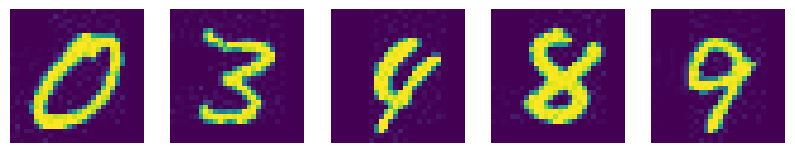

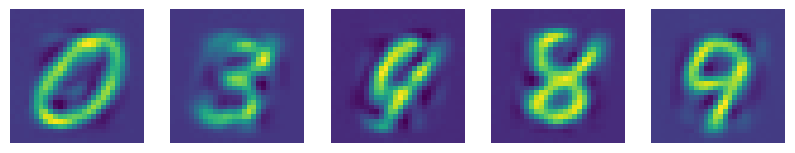

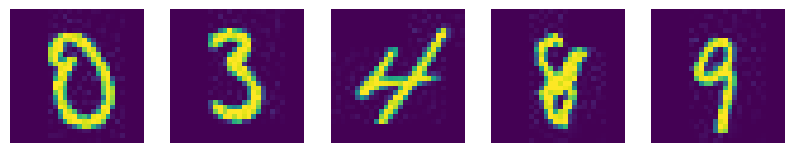

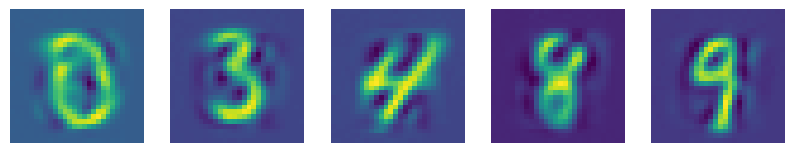

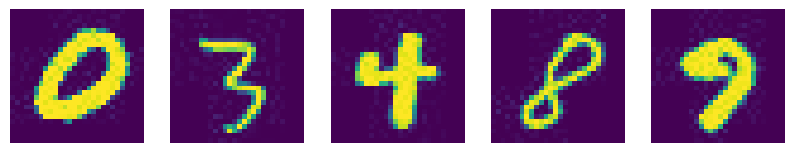

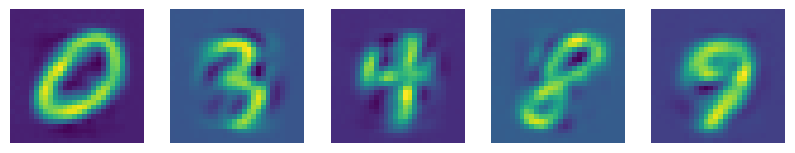

In [ ]:

combined_plot(auto_model_32_1h)